# CHAPTER 4 - LOGISTIC REGRESSION

## Create a dummy dataset

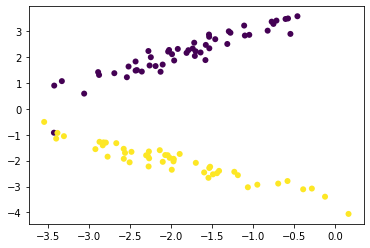

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, 
                           class_sep = 2.0, random_state=101)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, linewidth=0, edgecolor=None)
plt.show()

In [2]:
y_orig = [0,0,0,0,0,0,1,1,1,1]
y_pred = [0,0,0,0,1,1,1,1,1,0]

## Measuring the classifier's performance

In [3]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_orig, y_pred)

array([[4, 2],
       [1, 3]])

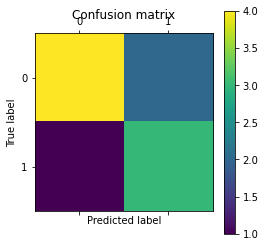

In [4]:
plt.matshow(confusion_matrix(y_orig, y_pred))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_orig, y_pred)

0.7

In [6]:
from sklearn.metrics import precision_score
precision_score(y_orig, y_pred)

0.6

In [7]:
from sklearn.metrics import recall_score
recall_score(y_orig, y_pred)

0.75

In [8]:
from sklearn.metrics import f1_score
f1_score(y_orig, y_pred)

0.6666666666666665

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_orig, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



## Fitting the classifier

In [10]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y.astype(float), 
                                   test_size=0.33, random_state=101)


ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [ ]:
y_test.dtype

In [ ]:
y_test

In [ ]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)
regr.predict(X_test)

## The sigmoid (logit) function

In [ ]:
import numpy as np

def model(x):
    return 1 / (1 + np.exp(-x))

X_vals = np.linspace(-10, 10, 1000)
plt.plot(X_vals, model(X_vals), color='blue', linewidth=3)
plt.ylabel('sigma(t)')
plt.xlabel('t')

plt.show()

## Classification and decision boundaries

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train.astype(int))
y_clf = clf.predict(X_test)

print(classification_report(y_test, y_clf))

In [ ]:
# Example based on:
# Code source: Gaël Varoquaux, Modified for documentation by Jaques Grobler, License: BSD 3 clause

h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.autumn)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', linewidth=0, cmap=plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.autumn)

ax = plt.axes()
ax.arrow(0, 0, clf.coef_[0][0], clf.coef_[0][1], head_width=0.5, head_length=0.5, fc='k', ec='k')
plt.scatter(0, 0, marker='o', c='k')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [ ]:
clf.coef_

In [ ]:
%timeit clf.fit(X, y)

In [ ]:
%timeit clf.predict(X)

In [ ]:
%timeit clf.predict_proba(X)

In [ ]:
# Clean all previous variables
%reset -f

## Multiclass Logistic Regression

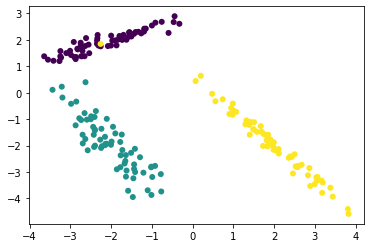

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200, n_features=2, 
                           n_classes=3, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, 
                           class_sep = 2.0, random_state=101)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, linewidth=0, edgecolor=None)
plt.show()

In [14]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y.astype(float), 
                                   test_size=0.33, random_state=101)

In [15]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train.astype(int))
y_clf = clf.predict(X_test)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_clf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        24
         1.0       1.00      1.00      1.00        22
         2.0       1.00      1.00      1.00        20

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



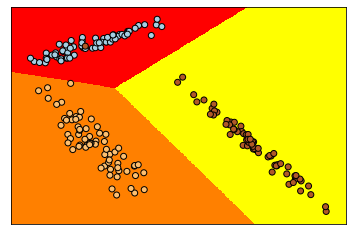

In [17]:
import numpy as np

h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.autumn)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [18]:
print(X_test[0])
print(y_test[0])
print(y_clf[0])

[-3.26744968  1.19639333]
0.0
0


In [19]:
clf.predict_proba(X_test[0])

ValueError: Expected 2D array, got 1D array instead:
array=[-3.26744968  1.19639333].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [20]:
clf.decision_function(X_test[0])

ValueError: Expected 2D array, got 1D array instead:
array=[-3.26744968  1.19639333].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# An example

In [ ]:
X, y = make_classification(n_samples=10000, n_features=10, 
                           n_informative=10, n_redundant=0, 
                           random_state=101)

## Using statsmodels

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
Xc = sm.add_constant(X)
logistic_regression = sm.Logit(y,Xc)
fitted_model = logistic_regression.fit()

In [ ]:
fitted_model.summary()

In [ ]:
import pandas as pd

# As an alternative, this example is using the statsmodels.formula.api module
# Equivalent to the R syntax for linear models, it requires to specify the form
# of the logistic regression using 'response ~ predictor1 (+ predictor2 + ...)'

Xd = pd.DataFrame(X)
Xd.columns = ['VAR'+str(i+1) for i in range(10)]
Xd['response'] = y

logistic_regression = smf.logit(
    formula = 'response ~ VAR1+ VAR2 + VAR3 + VAR4 + \
               VAR5 + VAR6 + VAR7 + VAR8 + VAR9 + VAR10',
               data=Xd)

fitted_model = logistic_regression.fit()
fitted_model.summary()

## Gradient Descend

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
observations = len(X)
variables = ['VAR'+str(i+1) for i in range(10)]

In [ ]:
import random

def random_w( p ):
    return np.array([np.random.normal() for j in range(p)])

def sigmoid(X,w):
    return 1./(1.+np.exp(-np.dot(X,w)))

def hypothesis(X,w):
    return np.dot(X,w)

def loss(X,w,y):
    return hypothesis(X,w) - y

def logit_loss(X,w,y):
    return sigmoid(X,w) - y

def squared_loss(X,w,y):
    return loss(X,w,y)**2

def gradient(X,w,y,loss_type=squared_loss):
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)):
        gradients.append(np.sum(loss_type(X,w,y) * X[:,j]) / n)
    return gradients

def update(X,w,y, alpha=0.01, loss_type=squared_loss):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y,loss_type))]

def optimize(X,y, alpha=0.01, eta = 10**-12, loss_type=squared_loss, iterations = 1000):
    standardization = StandardScaler()
    Xst = standardization.fit_transform(X)
    original_means, originanal_stds = standardization.mean_, standardization.std_
    Xst = np.column_stack((Xst,np.ones(observations)))
    w = random_w(Xst.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(Xst,w,y))
        new_w = update(Xst,w,y, alpha=alpha, loss_type=logit_loss)
        new_SSL = np.sum(squared_loss(Xst,new_w,y))
        w = new_w
        if k>=5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta):
            path.append(new_SSL)
            break
        if k % (iterations / 20) == 0:
            path.append(new_SSL)
    unstandardized_betas = w[:-1] / originanal_stds
    unstandardized_bias  = w[-1]-np.sum((original_means / originanal_stds) * w[:-1])
    return np.insert(unstandardized_betas, 0, unstandardized_bias), path, k
                                  
alpha = 0.5
w, path, iterations = optimize(X, y, alpha, eta = 10**-5, loss_type=logit_loss, iterations = 100000)
print ("These are our final standardized coefficients: %s" % w)
print ("Reached after %i iterations" % (iterations+1))

## Scikit-Learn implementations

In [ ]:
from sklearn.linear_model import LogisticRegression

# C: Inverse of regularization strength; must be a positive float.
# tol: Tolerance for stopping criteria.

clf = LogisticRegression(C=1E4, tol=1E-25, random_state=101)
clf.fit(X,y)

In [ ]:
coeffs = [clf.intercept_[0]]
coeffs.extend(clf.coef_[0])
coeffs

In [ ]:
from sklearn.linear_model import SGDClassifier

# alpha: Constant that multiplies the regularization term.
# n_iter: The number of passes over the training data (aka epochs).


clf = SGDClassifier(loss='log', alpha=1E-4, n_iter=1E2, random_state=101)
clf.fit(X,y)

In [ ]:
coeffs = [clf.intercept_[0]]
coeffs.extend(clf.coef_[0])
coeffs